In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
import os
import matplotlib.pyplot as plt

In [2]:
# Paths to the dataset
train_dir = '../dataset/train'
validation_dir = '../dataset/validation'
test_dir = '../dataset/test'

In [3]:
# Data preprocessing and augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if you have 2 classes
)

# Load and preprocess the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 4945 images belonging to 4 classes.
Found 1312 images belonging to 4 classes.
Found 1308 images belonging to 4 classes.


In [9]:
num_classes = 4

In [10]:
# Define a CNN model for multi-class classification
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),  # Input shape for 150x150 RGB images
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs = 50

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the model
model.save('./output/mango_classifier_22092024_3-30.h5')

Epoch 1/50


d:\Projects\VideoToPicture\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.6299 - loss: 0.8512 - val_accuracy: 0.7942 - val_loss: 0.5521
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8125 - loss: 0.6175 
Epoch 3/50


C:\Users\Nhat Trong\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


154/154 ━━━━━━━━━━━━━━━━━━━━ 120s 755ms/step - accuracy: 0.8806 - loss: 0.3035 - val_accuracy: 0.9688 - val_loss: 0.1166
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.9062 - loss: 0.4531  
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 121s 763ms/step - accuracy: 0.9096 - loss: 0.2315 - val_accuracy: 0.9352 - val_loss: 0.2420
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.9375 - loss: 0.1335 
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 108s 679ms/step - accuracy: 0.9451 - loss: 0.1572 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.9688 - loss: 0.1383  
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 109s 688ms/step - accuracy: 0.9655 - loss: 0.0958 - val_accuracy: 0.9733 - val_loss: 0.0893
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.9688 - loss: 0.1491  
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 111s 702ms/step - accuracy: 0.9088 - loss: 0.2741 - val_accuracy: 0.9886 - val_loss: 

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 615ms/step - accuracy: 0.9892 - loss: 0.0305
Test Accuracy: 99.01%


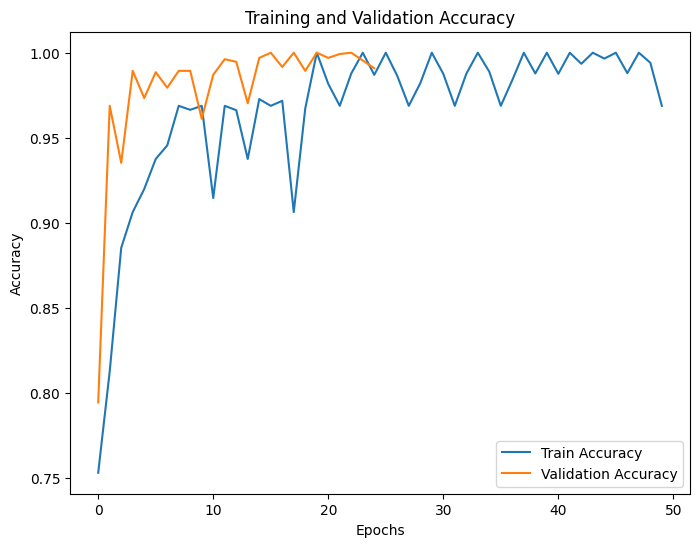

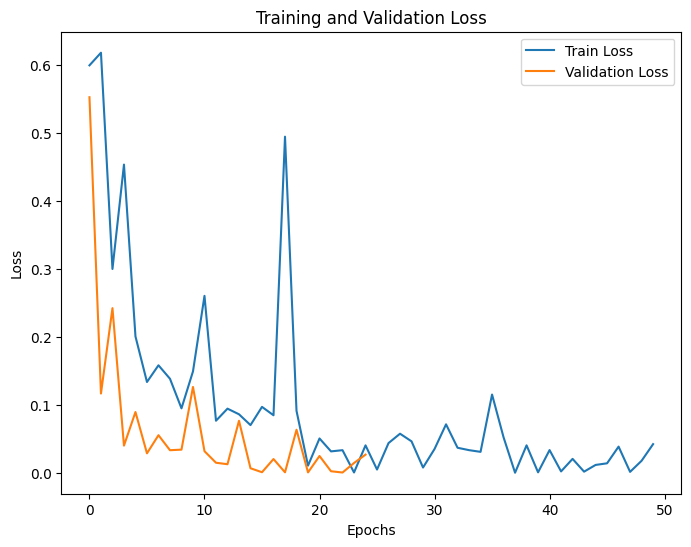

In [13]:
# Plotting training history

# Accuracy plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_confusion_matrix_heatmap(test_generator, model, class_labels):
    # Get true labels and predicted labels
    true_labels = []
    predicted_labels = []

    # Loop through the entire test set
    for i in range(len(test_generator)):
        # Get a batch of images and labels
        images, labels = test_generator[i]

        # Predict using the model
        predictions = model.predict(images)

        # For multi-class classification, use np.argmax to get the predicted class
        predicted_class = np.argmax(predictions, axis=-1)
        true_class = np.argmax(labels, axis=-1)

        # Append the true and predicted labels
        true_labels.extend(true_class)
        predicted_labels.extend(predicted_class)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    return cm


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━

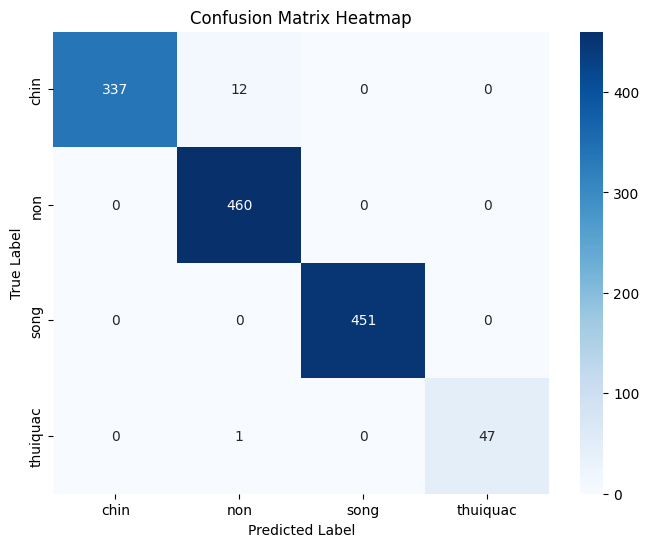

In [27]:
# Assuming 'model' is your trained CNN model and 'test_generator' is your test data generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix heatmap
confusion_matrix = plot_confusion_matrix_heatmap(test_generator, model, class_labels)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def predict_random_image_from_test(test_generator, model):
    # Get a batch of images and labels from the test set
    batch = next(test_generator)
    images, labels = batch[0], batch[1]

    # Pick a random index from the batch
    random_index = np.random.randint(0, len(images))
    random_image = images[random_index]
    random_label = labels[random_index]
    
    # Make a prediction
    prediction = model.predict(np.expand_dims(random_image, axis=0))
    
    # For multi-class classification, use np.argmax to get the predicted class index
    predicted_label = np.argmax(prediction, axis=-1).item()  # Use np.argmax for multi-class
    
    # Get the true label from one-hot encoded label
    actual_label = np.argmax(random_label).item()
    
    # Map the labels back to class names
    class_labels = list(test_generator.class_indices.keys())
    actual_class = class_labels[actual_label]
    predicted_class = class_labels[predicted_label]

    # Display the image and predictions
    plt.imshow(random_image)
    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


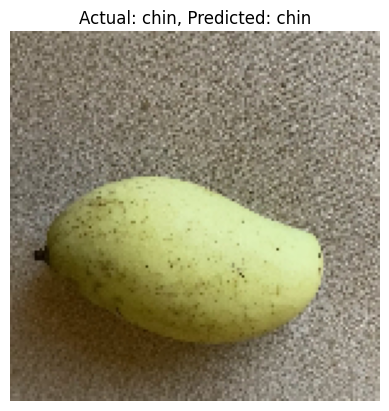

In [15]:
# Example usage:
predict_random_image_from_test(test_generator, model)

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_new_image(image_path, model, class_labels, target_size=(150, 150)):
    # Load the image
    img = image.load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Rescale pixel values to [0, 1] to match the training preprocessing
    img_array = img_array / 255.0
    
    # Expand dimensions to match the expected input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make the prediction
    prediction = model.predict(img_array)
    
    # Use np.argmax for multi-class classification
    predicted_label = np.argmax(prediction, axis=-1).item()
    
    # Map the predicted label to the class name
    predicted_class = class_labels[predicted_label]
    
    # Display the image and prediction
    img_display = image.load_img(image_path)  # Reload for displaying (original image)
    plt.imshow(img_display)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


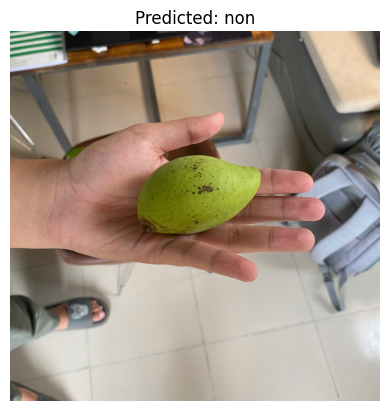

The predicted class is: non


In [17]:
class_labels = list(test_generator.class_indices.keys())

image_path = '../new_to_test/1.jpg'

predicted_class = predict_new_image(image_path, model, class_labels)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


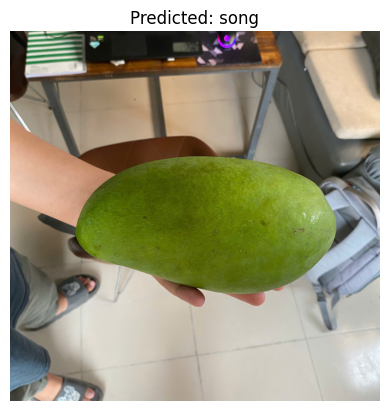

The predicted class is: song


In [18]:
image_path = '../new_to_test/2.jpg'

predicted_class = predict_new_image(image_path, model, class_labels)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


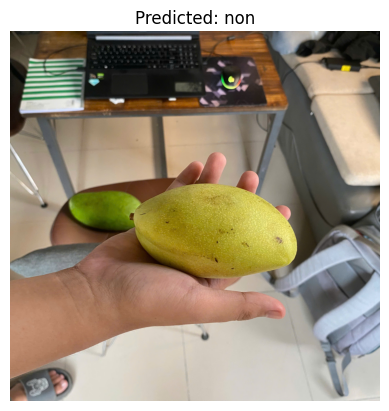

The predicted class is: non


In [19]:
image_path = '../new_to_test/3.jpg'

predicted_class = predict_new_image(image_path, model, class_labels)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


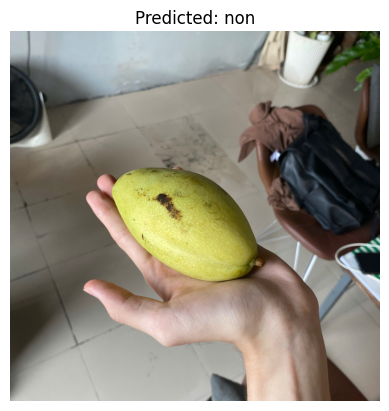

The predicted class is: non


In [20]:
image_path = '../new_to_test/4.jpg'

predicted_class = predict_new_image(image_path, model, class_labels)
print(f"The predicted class is: {predicted_class}")